In [3]:
import sys
import os
import numpy as np
sys.path.append(r'D:\MIBI-TOFF\scripts\Mibi-Analysis-py')
from mibi_helper import mibi_eroder
from mask2bounds import mask2bounds,visualize_bounds

NpzFile 'D:\\MIBI-TOFF\\Data\\FOV1_G4_CD4.npz' with keys: imageData, FOV_table, clustered_seg, segmentation
(2048, 2048)


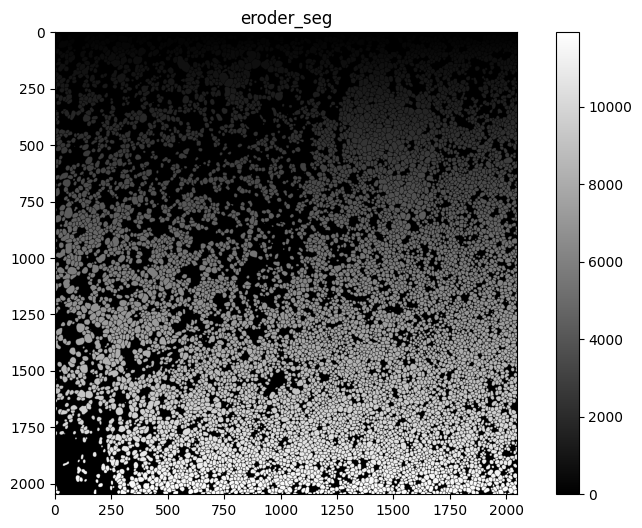

In [4]:
save_directory=r'D:\MIBI-TOFF\Data'
directory = save_directory  

file=r'D:\MIBI-TOFF\Data\FOV1_G4_CD4.npz'
data_catch=np.load(file,allow_pickle=True)
print(data_catch)
segmentation=data_catch['segmentation']
remove_non_cells=data_catch['clustered_seg']
segmentation=segmentation
remove_non_cells=remove_non_cells
print(np.shape(segmentation))
#This is to test how we can easily remove types that are not useful or to reduce the space down to a single cell type
values_to_set_to_zero=[2,3,4,12]#These values are depended on the the cluster_map json always remove unidentified
# Create a boolean mask for the values to be set to zero
mask = np.isin(remove_non_cells, values_to_set_to_zero)
# Set the values to zero using the mask
remove_non_cells[mask] = 0
remove_non_cells[remove_non_cells>0]=1
segmentation=segmentation*remove_non_cells

eroder_seg=mibi_eroder(segmentation)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.imshow(eroder_seg, cmap='gray')
plt.title('eroder_seg')
plt.colorbar()
plt.show()


In [5]:
eroder_seg[eroder_seg > 0] = 1

bounds=mask2bounds(eroder_seg)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2433: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'cv::fillPoly'
